# Sales Prediction Dataset
This notebook answers 7 key business questions using linear regression and correlation analysis.

## Q1: What is the average amount spent on TV advertising in the dataset?

In [1]:

import pandas as pd

# Load dataset
df = pd.read_excel("advertising_sales_data.xlsx")

# Drop missing values for consistency
df = df.dropna()

# Average TV spend
df['TV'].mean()


np.float64(146.78585858585862)

**Explanation:**
- Calculates the mean of the `TV` column to understand the average TV advertising expenditure.

## Q2: What is the correlation between radio advertising expenditure and product sales?

In [2]:

correlation = df['Radio'].corr(df['Sales'])
correlation


np.float64(0.3497277129207837)

**Explanation:**
- Computes Pearson correlation between `Radio` and `Sales`.
- Positive value indicates direct relationship.

## Q3: Which advertising medium has the highest impact on sales based on the dataset?

In [3]:

df[['TV', 'Radio', 'Newspaper']].corrwith(df['Sales']).sort_values(ascending=False)


,0
TV,0.901372
Radio,0.349728
Newspaper,0.159125


**Explanation:**
- Calculates correlation of each medium with `Sales`.
- Highest correlation indicates most impactful medium.

## Q4: Plot a linear regression line with all variables and visualize predictions vs actual sales.

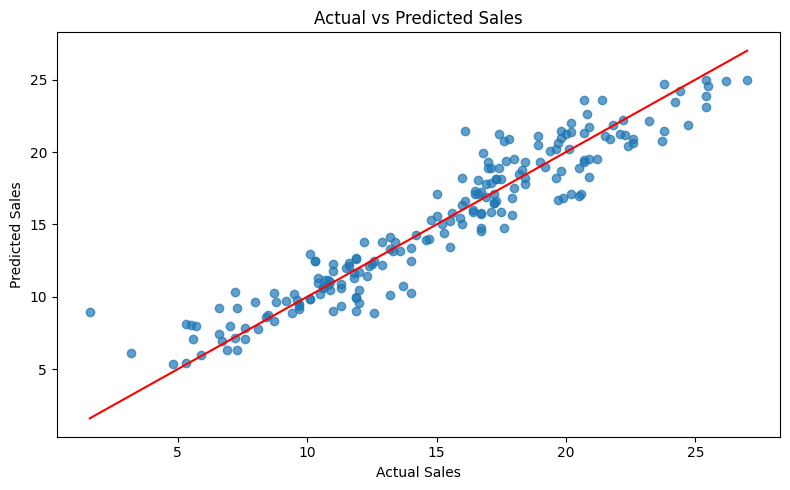

In [4]:

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(y, y_pred, alpha=0.7)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # ideal line
plt.tight_layout()
plt.show()


**Explanation:**
- Trains a linear regression model using all features.
- Scatter plot compares predicted vs actual sales.
- Red line shows ideal predictions.

## Q5: How would sales be predicted for a new set of advertising expenditures: \$200 on TV,  \$40 on Radio, and \$50 on Newspaper?

In [8]:
import numpy as np
import pandas as pd

new_data = pd.DataFrame([[200, 40, 50]], columns=['TV', 'Radio', 'Newspaper'])
prediction = model.predict(new_data)
prediction[0]



np.float64(19.819378160410906)

**Explanation:**
- Uses the trained model to predict sales for a new set of ad expenditures.

## Q6: How does the performance of the linear regression model change when the dataset is normalized?

In [6]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)
y_pred_scaled = model_scaled.predict(X_scaled)

r2_score(y, y_pred), r2_score(y, y_pred_scaled)


(0.9029164691118196, 0.9029164691118196)

**Explanation:**
- Compares R² score of original and normalized models.
- Normalization helps if features are on different scales.

## Q7: What is the impact on the sales prediction when only Radio and Newspaper are used as predictors?

In [7]:

X_rn = df[['Radio', 'Newspaper']]
model_rn = LinearRegression()
model_rn.fit(X_rn, y)
r2_score(y, model_rn.predict(X_rn))


0.12370915572237262

**Explanation:**
- Trains a model using only `Radio` and `Newspaper`.
- Lower R² score compared to using all features shows reduced model performance.